In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import Deep learning LIBS.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import math
from keras.utils.vis_utils import plot_model
#import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [ ]:
df=pd.read_csv("/content/Gold_data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,...,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,12/15/2011,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,...,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,12/16/2011,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,...,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,12/19/2011,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,...,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,12/20/2011,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,...,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,12/21/2011,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,...,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [ ]:
df.shape

(1718, 81)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [ ]:
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [ ]:
df.drop("Date",axis=1,inplace=True)
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,192.204570,1.098026e+08,18161.094398,18244.137842,18073.889095,18164.119043,18164.119043,1.779131e+08,28.276554,28.822555,27.653655,28.209302,27.783958,1.136074e+06,1.208494,1.208531,1.213360,1.203692,0.494761,77.504523,77.521740,78.384936,76.593894,225958.585565,0.498836,70.153097,70.275396,71.120256,69.330990,0.503492,43284.478463,43308.692084,43671.194412,42911.912107,26912.462165,0.480792,2.262769,2.263091,2.286512,2.238765,0.490105,1183.915425,1184.388853,1194.274622,1173.409692,0.484284,766.805122,766.363481,773.529302,759.444208,0.530850,1130.442375,89.809427,89.805442,90.098981,89.509331,27568.300349,0.512806,26.747427,27.071304,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,48.514161,4.925110e+07,3889.752079,3906.008604,3867.959072,3884.495887,3884.495887,1.212753e+08,20.325861,20.620624,19.972314,20.294635,19.721857,7.301289e+05,0.100535,0.100579,0.100184,0.100695,0.500118,27.400703,27.366113,27.393294,27.322868,88844.540581,0.500144,23.471514,23.480047,23.494737,23.422198,0.500133,7530.704012,7550.423242,7614.302267,7443.076538,21880.969122,0.499776,0.433469,0.433977,0.437574,0.429960,0.500048,273.842095,273.978168,275.427791,271.799909,0.499898,148.307189,148.078365,149.010291,147.381087,0.499193,570.012881,7.516115,7.520788,7.567895,7.459269,14643.314699,0.499982,10.620552,10.706388,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,104.468536,2.785650e+07,11769.209960,11925.879880,11735.190430,11766.259770,11766.259770,8.410000e+06,2.770000,2.850000,2.730000,2.800000,2.800000,1.645000e+05,1.038700,1.039000,1.041900,1.034100,0.000000,27.880000,27.990000,28.750000,27.100000,11520.000000,0.000000,26.550000,27.340000,27.610000,26.180000,0.000000,33170.000000,33146.000000,33566.000000,32626.000000,40.000000,0.000000,1.358000,1.366000,1.391000,1.321000,0.000000,775.600000,765.300000,786.500000,756.000000,0.000000,470.4500

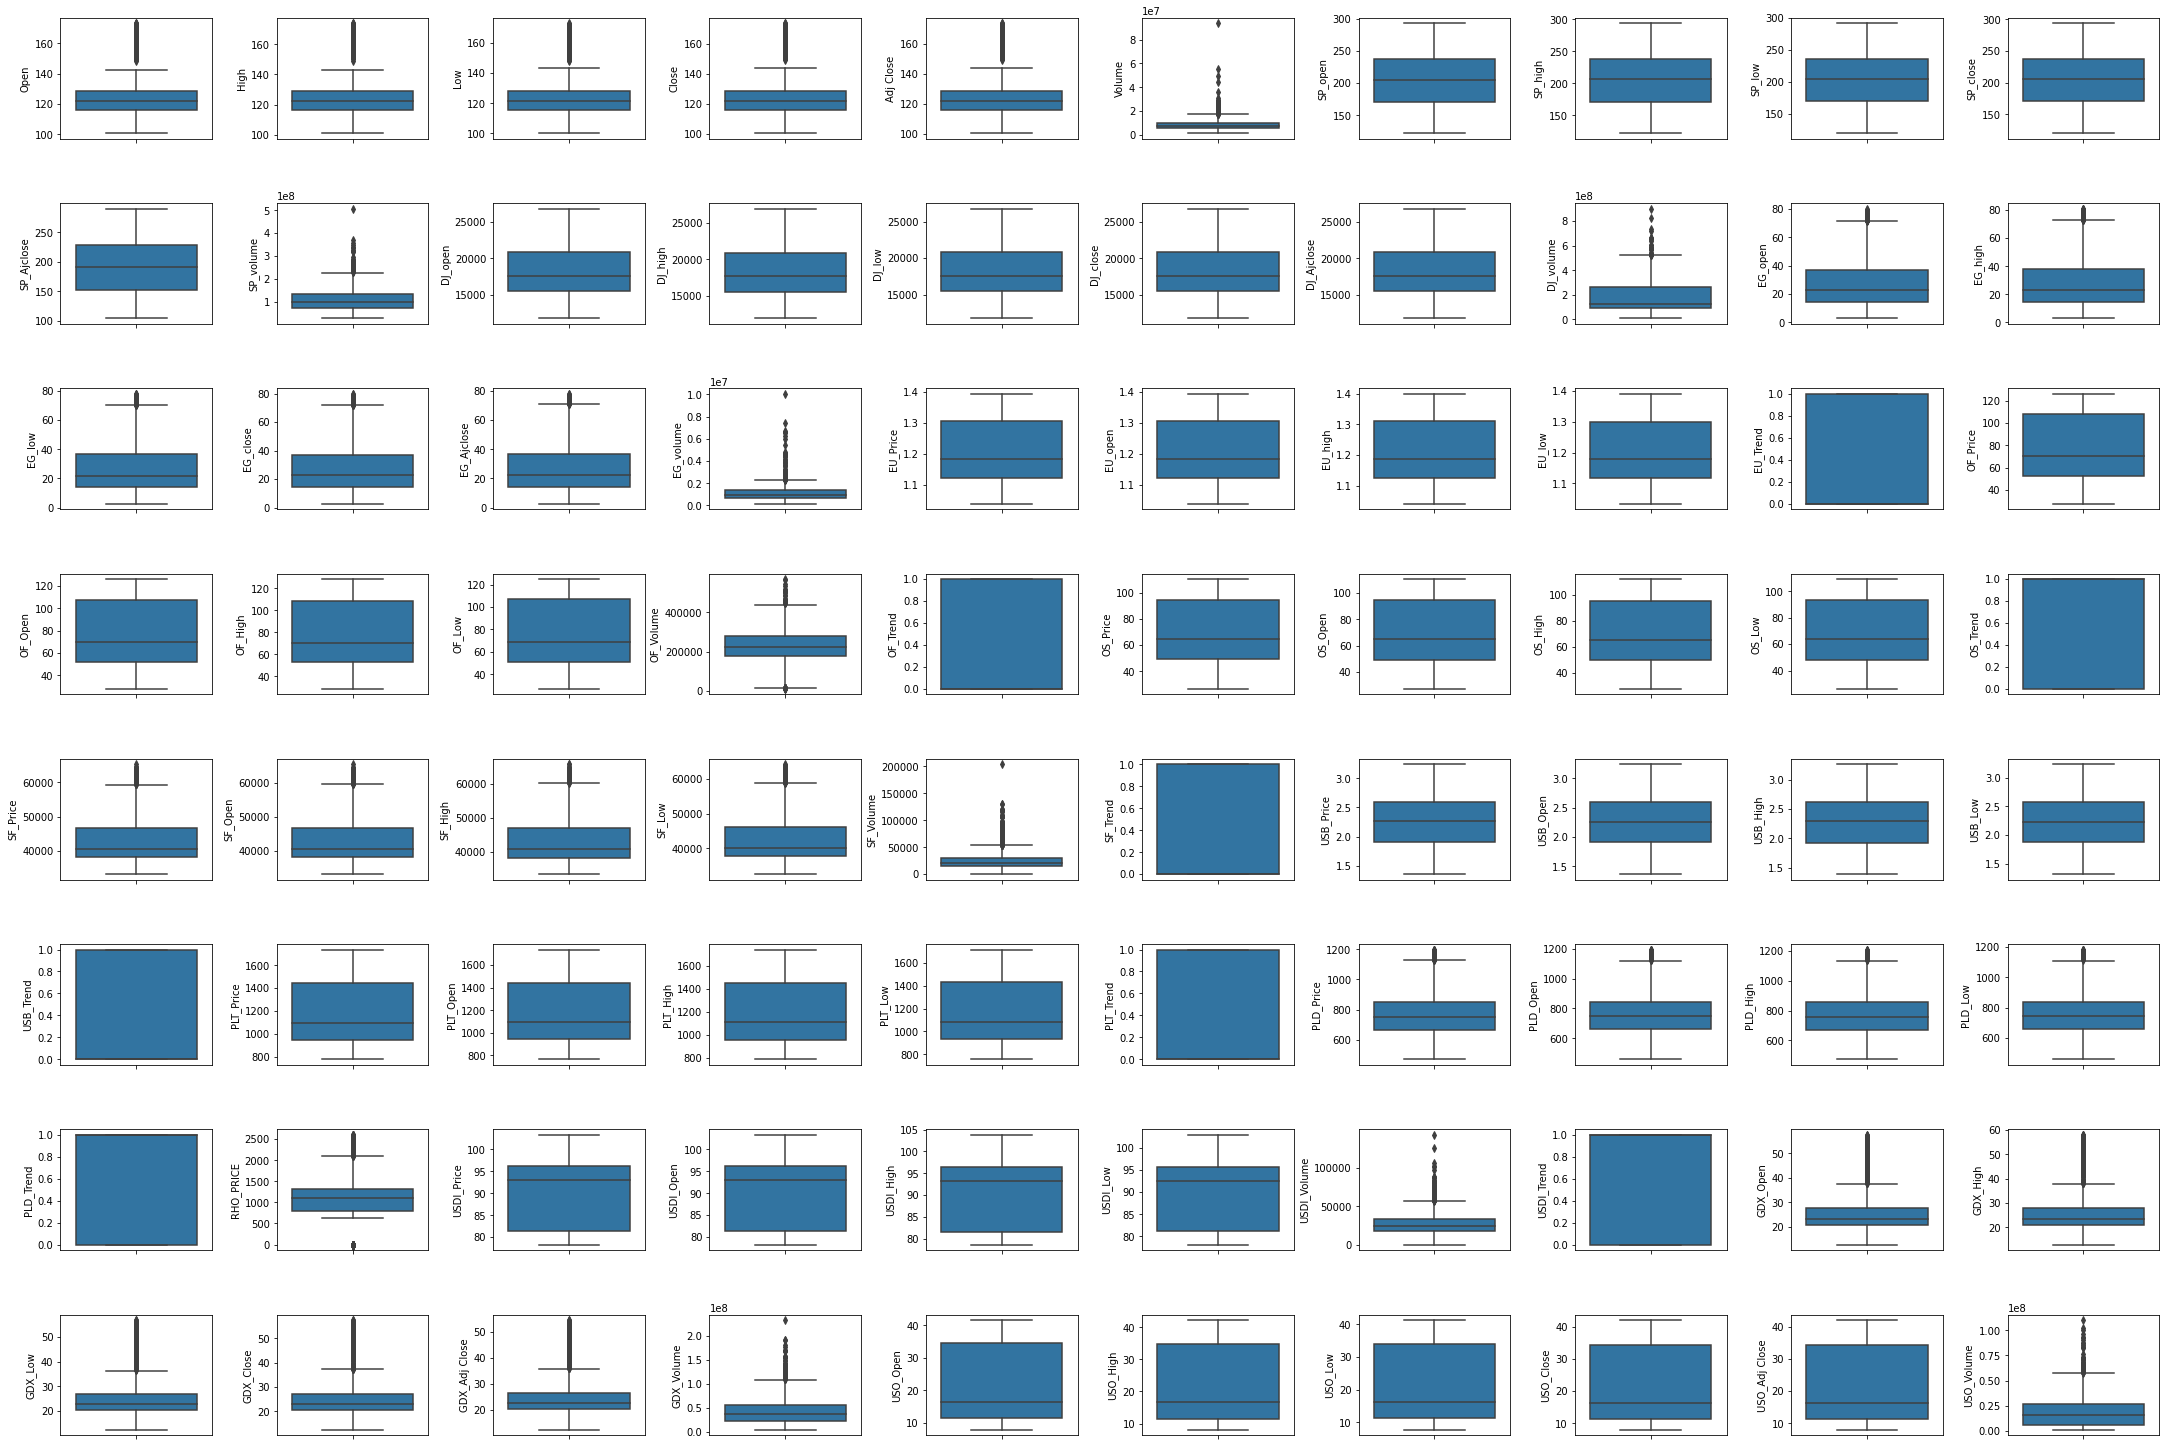

In [ ]:
fig,axs=plt.subplots(ncols=10,nrows=8,figsize=(30,20))
index=0
axs=axs.flatten()
for k,v in df.items():#k=y axis var name
  sns.boxplot(y=k,data=df,ax=axs[index])
  index+=1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)

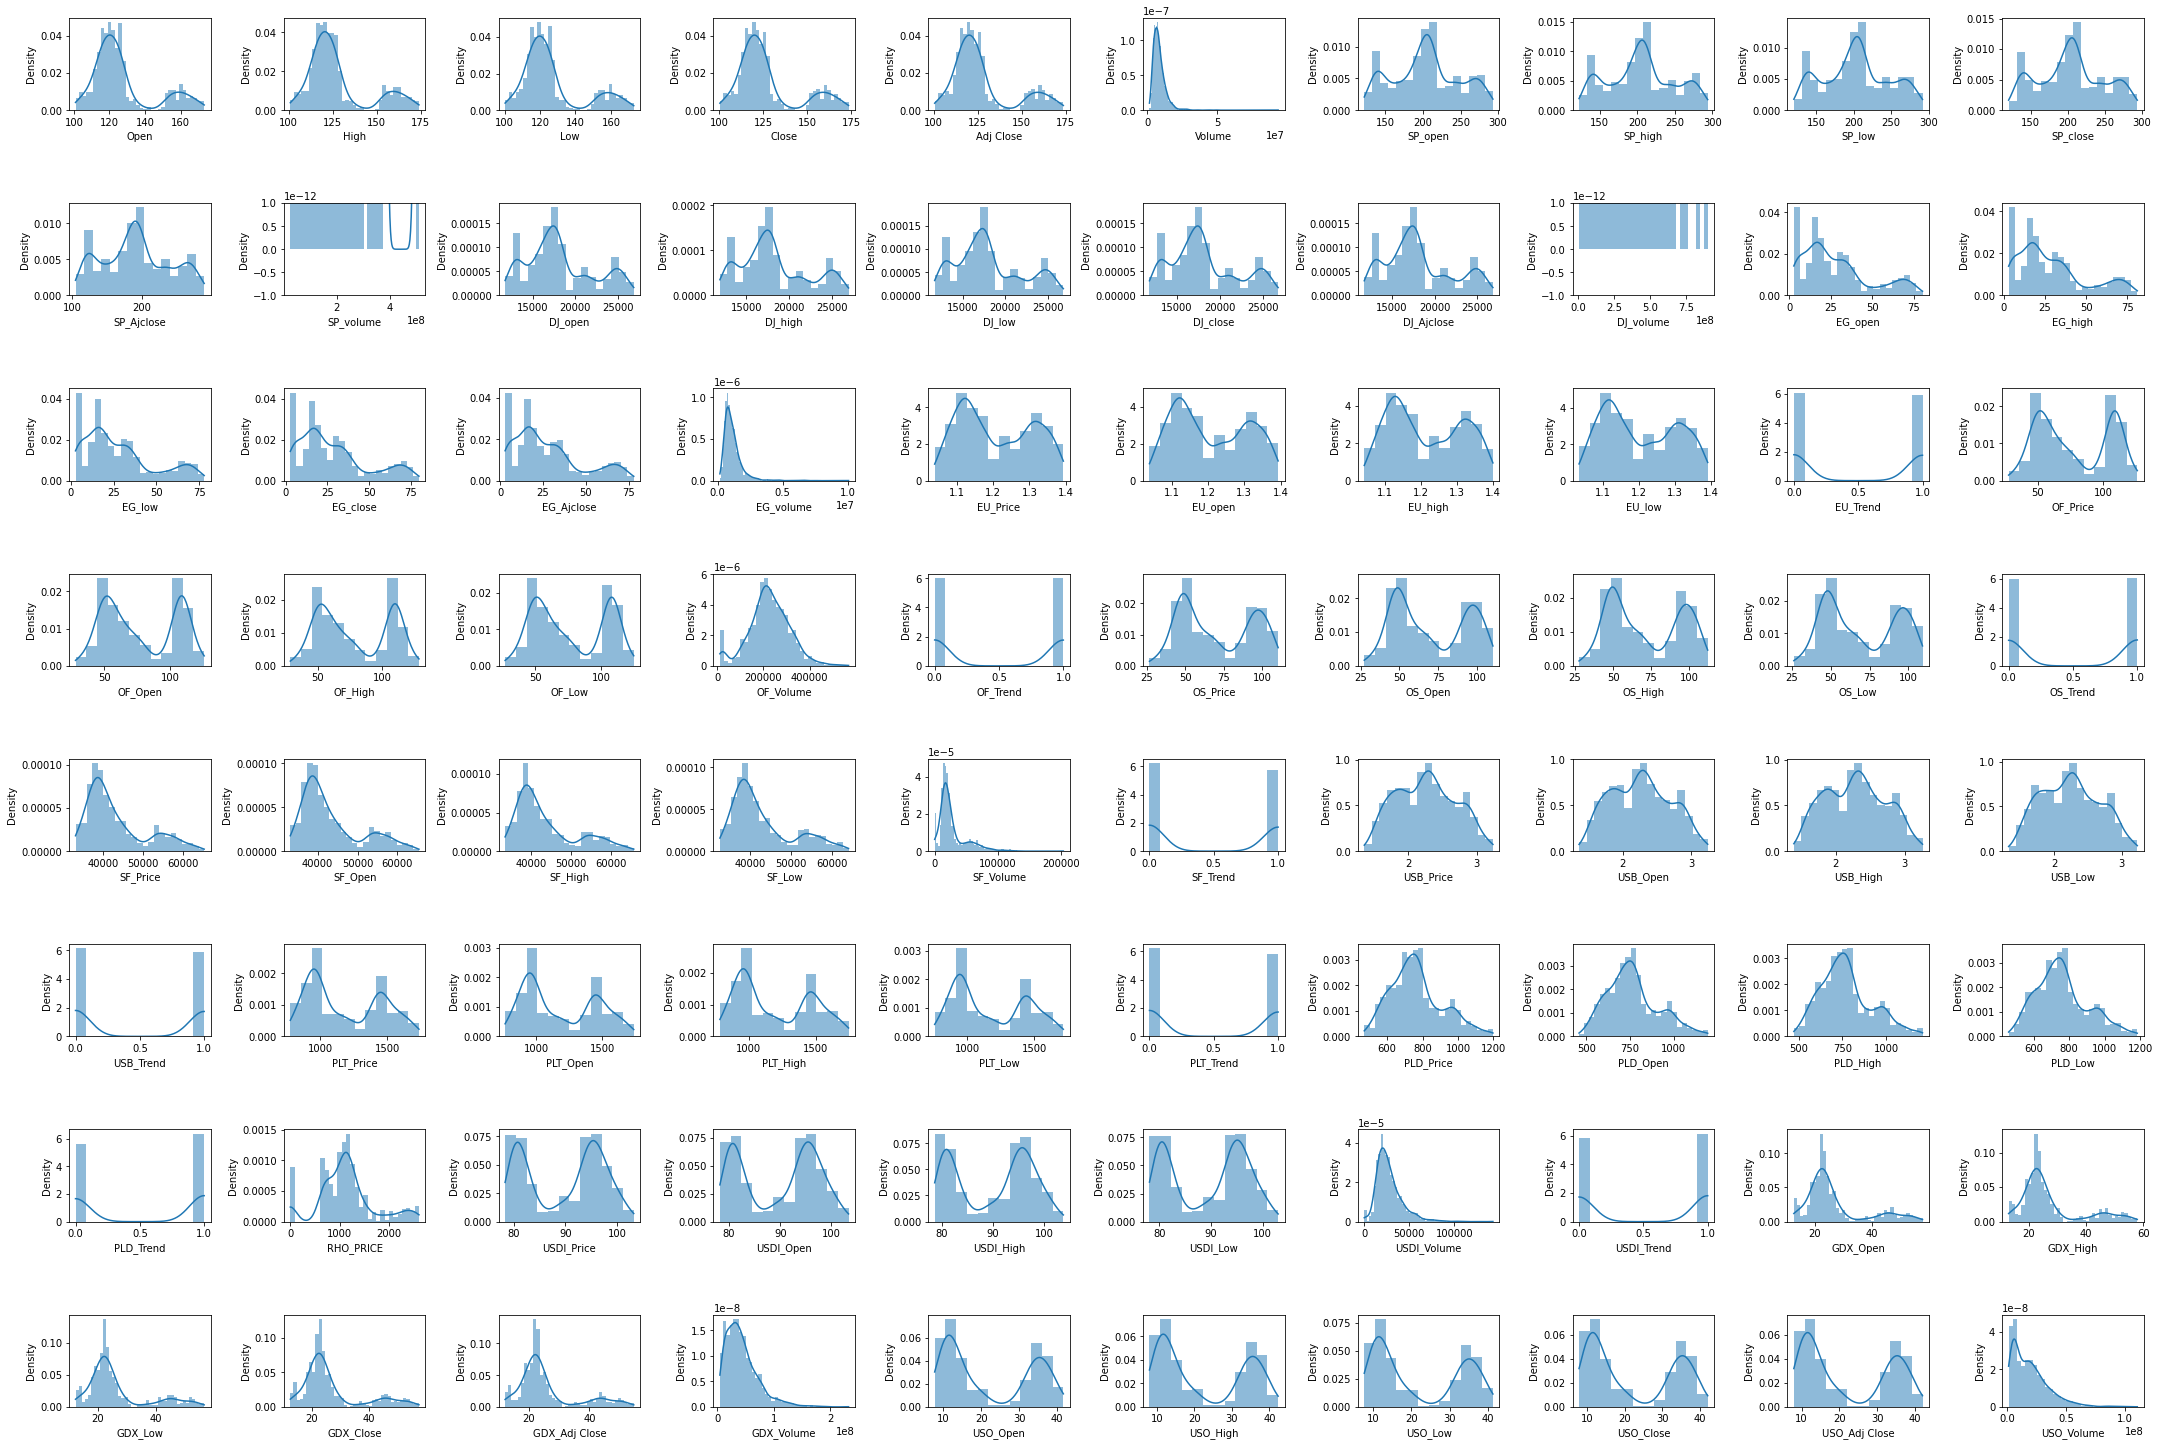

In [ ]:
fig,axs=plt.subplots(ncols=10,nrows=8,figsize=(30,20))
index=0
axs=axs.flatten()
for k,v in df.items():#v= panda series of a data for a particular column
  sns.histplot(v,ax=axs[index],kde=True,linewidth=0,stat='density')
  index+=1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)

In [ ]:
for k,v in df.items():#outlier %
  q1=v.quantile(0.25)
  q3=v.quantile(0.75)
  iqr=q3-q1
  vcol=v[(v<=q1-1.5*iqr)|(v>=q3+1.5*iqr)]
  perc=np.shape(vcol)[0]*100/np.shape(df)[0]
  print(f"{k} outliers={round(perc,2)}")


Open outliers=18.98
High outliers=18.98
Low outliers=18.92
Close outliers=18.92
Adj Close outliers=18.92
Volume outliers=3.78
SP_open outliers=0.0
SP_high outliers=0.0
SP_low outliers=0.0
SP_close outliers=0.0
SP_Ajclose outliers=0.0
SP_volume outliers=2.44
DJ_open outliers=0.0
DJ_high outliers=0.0
DJ_low outliers=0.0
DJ_close outliers=0.0
DJ_Ajclose outliers=0.0
DJ_volume outliers=1.46
EG_open outliers=4.31
EG_high outliers=4.25
EG_low outliers=4.07
EG_close outliers=3.9
EG_Ajclose outliers=2.97
EG_volume outliers=5.06
EU_Price outliers=0.0
EU_open outliers=0.0
EU_high outliers=0.0
EU_low outliers=0.0
EU_Trend outliers=0.0
OF_Price outliers=0.0
OF_Open outliers=0.0
OF_High outliers=0.0
OF_Low outliers=0.0
OF_Volume outliers=2.39
OF_Trend outliers=0.0
OS_Price outliers=0.0
OS_Open outliers=0.0
OS_High outliers=0.0
OS_Low outliers=0.0
OS_Trend outliers=0.0
SF_Price outliers=4.25
SF_Open outliers=3.96
SF_High outliers=3.61
SF_Low outliers=4.19
SF_Volume outliers=13.62
SF_Trend outliers=0

In [ ]:
outliers=['GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'RHO_PRICE', 'SF_Volume', 'Open', 'High', 'Low', 'Close', 'Adj Close']
df2=df.copy(deep=True)

In [ ]:
#remove outliers
def remoutliers(df_in,col):
  for i in col:
    q1=df_in[i].quantile(0.25)
    q3=df_in[i].quantile(0.75)
    iqr=q3-q1
    fence_lw=q1-1.5*iqr
    fence_hg=q3+1.5*iqr
    df_out=df_in[(df_in[i]>fence_lw)&(df_in[i]<fence_hg)]
    return df_out

In [ ]:
df3=remoutliers(df2,outliers)

In [ ]:
df3.shape

(1416, 80)

In [ ]:
for k,v in df3.items():#outlier %
  q1=v.quantile(0.25)
  q3=v.quantile(0.75)
  iqr=q3-q1
  vcol=v[(v<=q1-1.5*iqr)|(v>=q3+1.5*iqr)]
  perc=np.shape(vcol)[0]*100/np.shape(df)[0]
  print(f"{k} outliers={round(perc,2)}")



Open outliers=1.8
High outliers=1.86
Low outliers=1.8
Close outliers=1.92
Adj Close outliers=1.92
Volume outliers=3.08
SP_open outliers=0.0
SP_high outliers=0.0
SP_low outliers=0.0
SP_close outliers=0.0
SP_Ajclose outliers=0.0
SP_volume outliers=3.73
DJ_open outliers=0.0
DJ_high outliers=0.0
DJ_low outliers=0.0
DJ_close outliers=0.0
DJ_Ajclose outliers=0.0
DJ_volume outliers=0.76
EG_open outliers=0.0
EG_high outliers=0.0
EG_low outliers=0.0
EG_close outliers=0.0
EG_Ajclose outliers=0.0
EG_volume outliers=4.07
EU_Price outliers=0.0
EU_open outliers=0.0
EU_high outliers=0.0
EU_low outliers=0.0
EU_Trend outliers=0.0
OF_Price outliers=0.0
OF_Open outliers=0.0
OF_High outliers=0.0
OF_Low outliers=0.0
OF_Volume outliers=3.2
OF_Trend outliers=0.0
OS_Price outliers=0.0
OS_Open outliers=0.0
OS_High outliers=0.0
OS_Low outliers=0.0
OS_Trend outliers=0.0
SF_Price outliers=2.79
SF_Open outliers=2.56
SF_High outliers=2.97
SF_Low outliers=2.44
SF_Volume outliers=4.25
SF_Trend outliers=0.0
USB_Price 

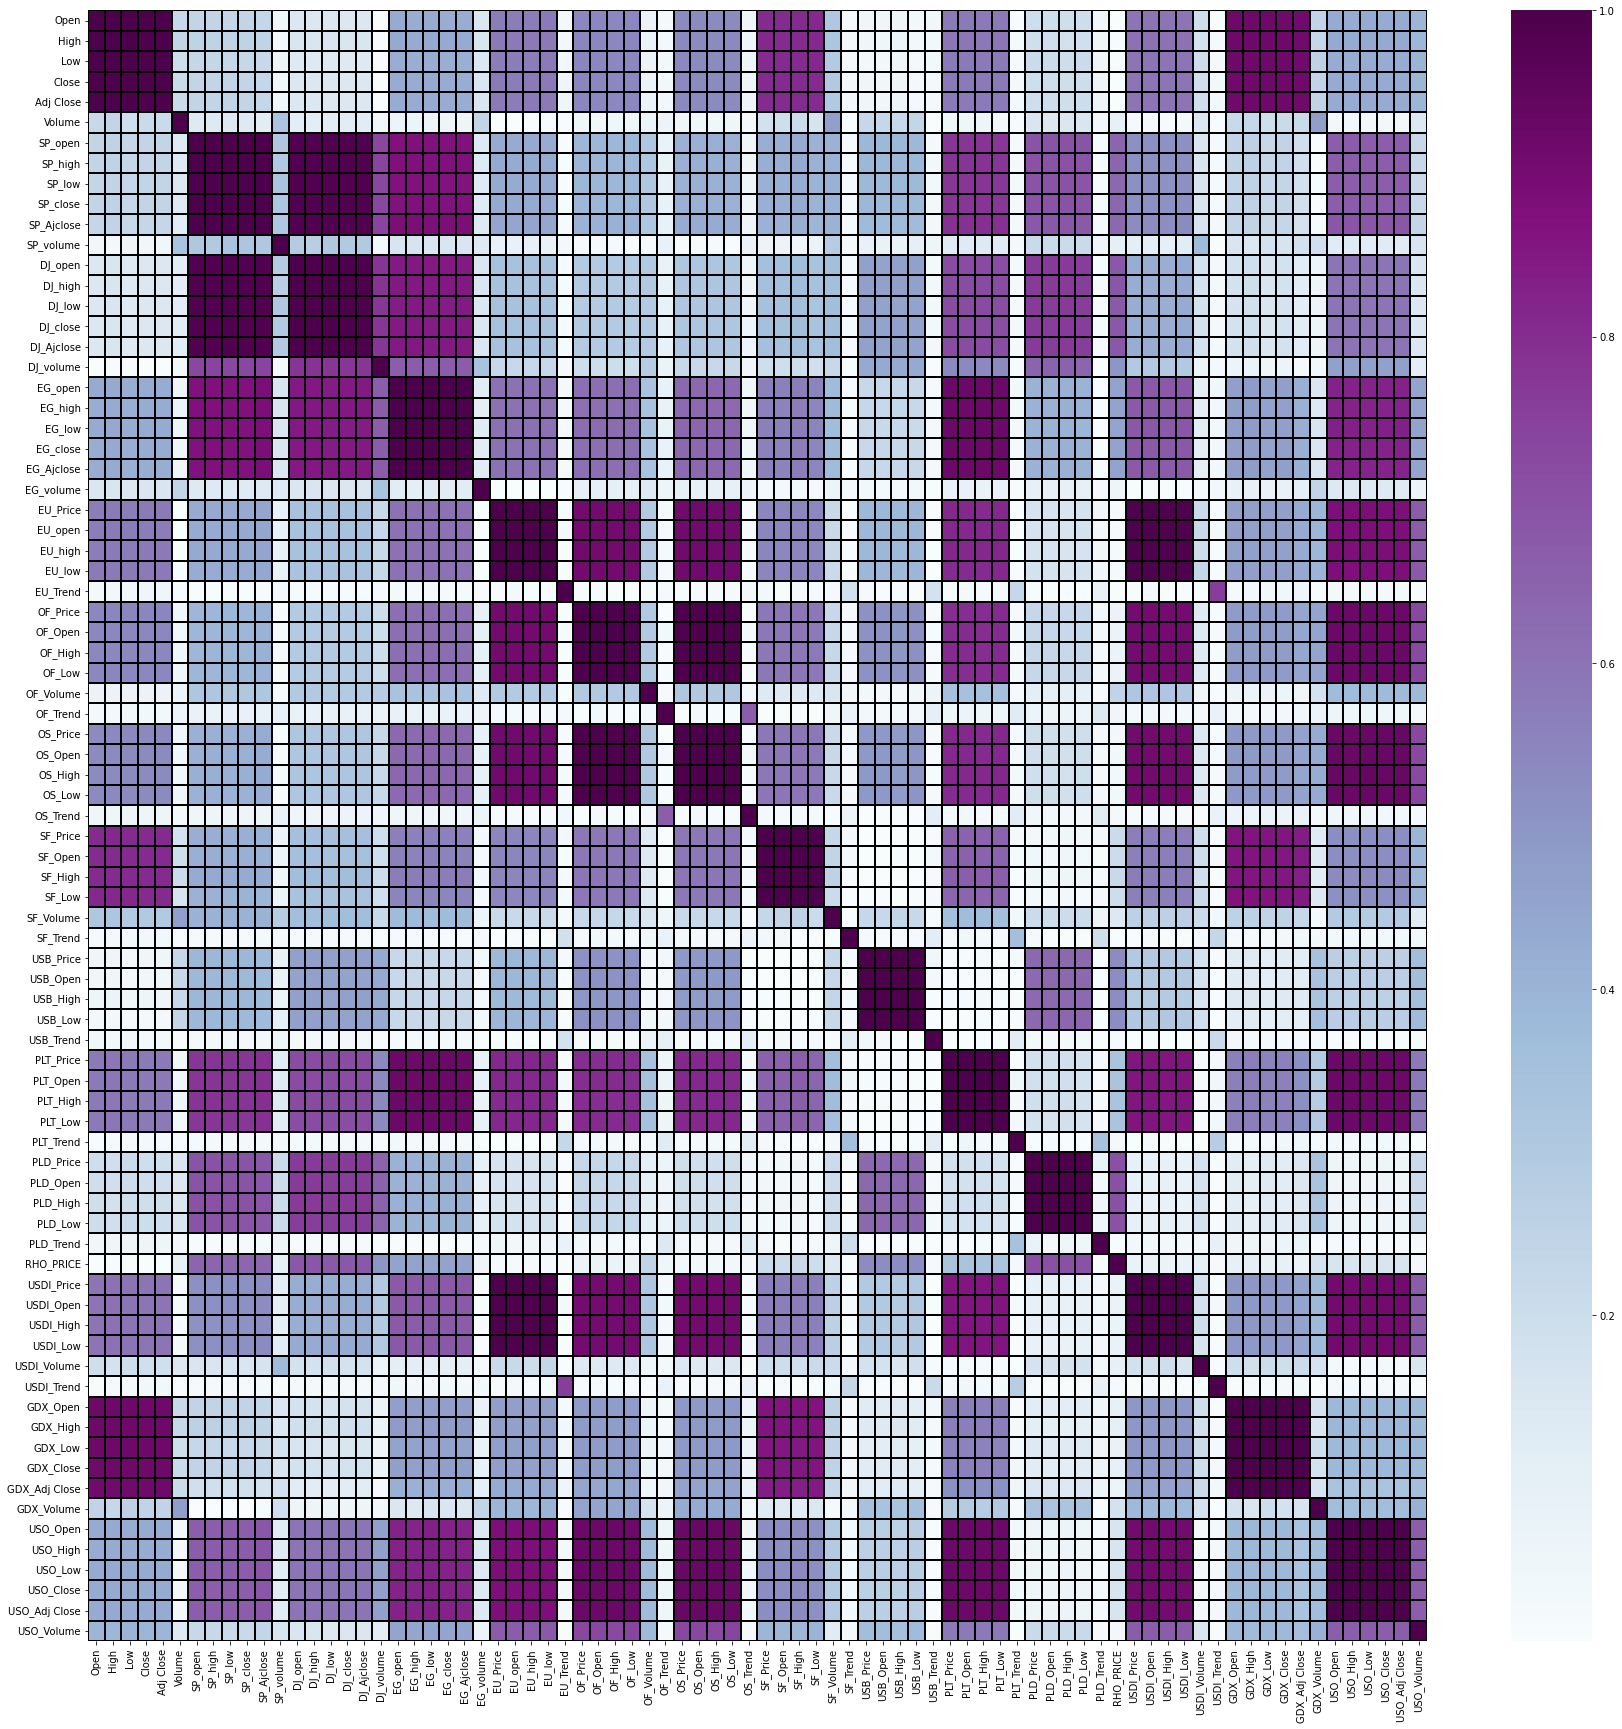

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df3.corr().abs(),annot=False,linecolor='black',linewidth=1,cmap='BuPu')

In [ ]:
ct=make_column_transformer(
    (MinMaxScaler(),['Open', 'High', 'Low', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume'])
)

In [ ]:
X = df3.drop(['Close', 'Adj Close'], axis=1)
Y = df3['Adj Close']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=53,test_size=0.2)


In [ ]:
#Transform Training data
ct.fit(X_train)
# #Transform training and test data with normalization(MinMaxScaler) and one hot encoding(OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
X_train_normal

array([[0.32100346, 0.31689253, 0.31693091, ..., 0.20222929, 0.20222929,
        0.34214954],
       [0.56583059, 0.56025299, 0.5627847 , ..., 0.96751589, 0.96751589,
        0.08848986],
       [0.34352686, 0.34092148, 0.35192267, ..., 0.73821651, 0.73821651,
        0.04591479],
       ...,
       [0.25581397, 0.25311658, 0.2378348 , ..., 0.39490448, 0.39490448,
        0.21300075],
       [0.4281268 , 0.42204157, 0.38053575, ..., 0.07388535, 0.07388535,
        0.35831534],
       [0.51052929, 0.51671182, 0.50920345, ..., 0.10254777, 0.10254777,
        0.26665788]])

In [ ]:
#set random seed so we can reproduce our results
tf.random.set_seed(66)
#create model and sequentially going through the data
g_model=tf.keras.Sequential([
    #3 hidden layer with 100 nurons as output
    tf.keras.layers.Dense(100,activation='relu'),#Activation() helps our network decide what is imp data
    tf.keras.layers.Dense(100,activation='relu'),#w/o it our sys is just a simple regression model
    tf.keras.layers.Dense(100,activation='relu'),#relu is (rectified linear Unit) is a () that is computationally efficient
    tf.keras.layers.Dense(1)#depending on the error values the weights are updates
])
#Compile the model(calc errors,optimized evaluate)
#Mean absoulte error finds the avg of error b/w prediction
#observered data (how incorrect are our predictions)
#adam : Optimizes our guessess by smoothing the predictions
# to the observed data 
#metrics tests the accuracy of the model
g_model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['mae'])
# Take the data and try to fit the data with 100 tries creating a trained model
# An epoch is a full iteration over the training data
fit_data=g_model.fit(X_train,Y_train,epochs=100,verbose=1)#Increasing Epochs decreasing loss

Epoch 1/100
36/36 [==============================] - 1s 2ms/step - loss: 4978994.0000 - mae: 4978994.0000
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 19028.9688 - mae: 19028.9688
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 5845.9590 - mae: 5845.9590
Epoch 4/100
36/36 [==============================] - 0s 1ms/step - loss: 2086.7529 - mae: 2086.7529
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 995.1351 - mae: 995.1351
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 221.3040 - mae: 221.3040
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 165.3663 - mae: 165.3663
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 135.5291 - mae: 135.5291
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 144.8473 - mae: 144.8473
Epoch 10/100
36/36 [==============================] - 0s 1ms/step - loss: 126.1591 - mae: 126.1591
Epo

In [ ]:
#evaluate the g_model
g_model_loss,g_model_mae=g_model.evaluate(X_test_normal,Y_test)

9/9 [==============================] - 0s 1ms/step - loss: 6.2286 - mae: 6.2286


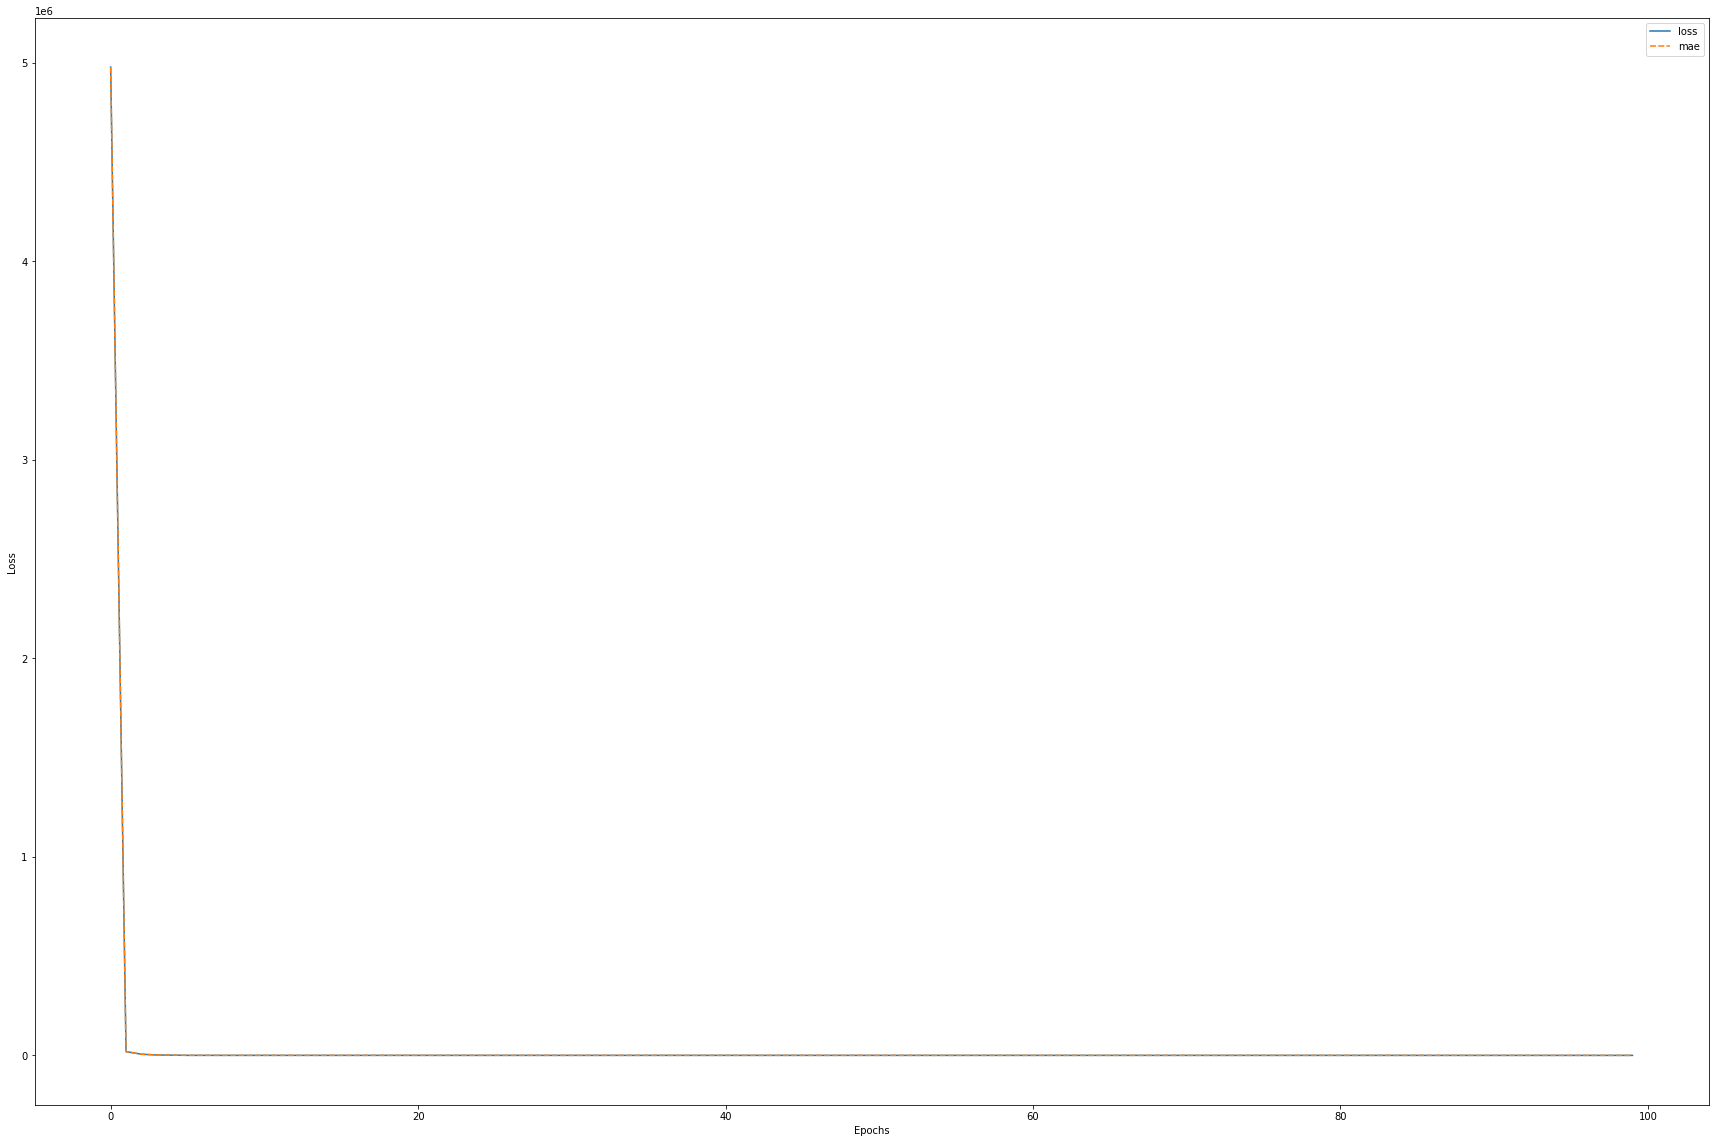

In [ ]:
plt.figure(figsize=(30,20))
plt.xlabel("Epochs")
plt.ylabel("Loss")
sns.lineplot(data=fit_data.history)


In [ ]:
#show the layers the ouput shape and the number of parameters for each layer
#Trainable Params : Model updates there as it does
# Non-Trainable Params : Not updated during training (Outside patterns from other models)
g_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               7900      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 28,201
Trainable params: 28,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_predict=g_model.predict(X_test_normal)
results_df=pd.DataFrame()
results_df['Predictions']=list(model_predict.flatten())
results_df['Actual']=list(Y_test)
display(results_df)


,Predictions,Actual
0,118.619797,127.660004
1,118.635529,113.080002
2,118.632790,122.449997
3,118.630257,127.160004
4,118.637833,104.019997
...,...,...
279,118.625450,121.129997
280,118.656647,102.940002
281,118.613686,117.580002
282,118.633842,122.489998
